Using kmeans to  predict target consumers of a Mall

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

#LOAD DATASET FROM GOOGLE DRIVE

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P14-Part6-Reinforcement-Learning/P14-Part4-Clustering/Section 25 - K-Means Clustering/Python/Mall_Customers.csv")

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Predict the target customers' for the mall based on their annual income and spending score.

The closer the spending score is to 100,the more likely the customer is the target

In [4]:
x = df[['Annual Income (k$)','Spending Score (1-100)']].values
#print(x)

In [5]:
type(x)

numpy.ndarray

#Calculating the number of clusters using elbow method

WCSS ( Within-Cluster Sum of Square) --- method for calculating no of K.

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10

In [8]:
from sklearn.cluster import KMeans
#CREATE EMPTY WCSS LIST
wcss = []
for i in range (1 , 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
  kmeans.fit(x)
  #wcss == inertia
  #add to list
  wcss.append(kmeans.inertia_)


PLOT THE ELBOW GRAGH

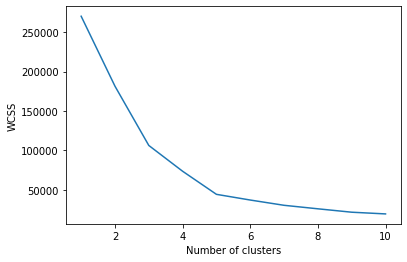

In [10]:
#X AXIS ==10 NUMBER 0F CLUSTERS ,WCSS = OUR GOTTEN NUMBER OF CLUSTERS
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Elbow forms at cluster 5.Train kmeans alg on 5

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(x)


In [12]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

PLOT THE 5 CLUSTERS..index of clusters is from 0 to 4

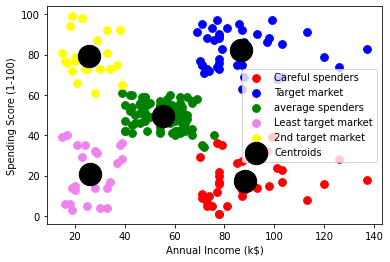

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Careful spenders')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Target market')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'average spenders')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Least target market')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 60, c = 'yellow', label = '2nd target market') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 500, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()